## WQD7003 Data Analytics - Group Assignment

### Title : Used Car Price Prediction

#### GROUP 9

S2117893 ----- TAY MIN ZHEN

S2023355 ----- CHEW WAY YAN         

17193835 ----- ZHAO ZIKUN

S2102673 ----- SAJAY THOMAS SAMUEL

S2127514 ----- ABY AZID ABU BAKAR

## Overview

A used car or sometimes referred to as a secondhand car is a vehicle that is owned by one or more owners. According to Mordor Intelligence (2021), the used car market is segmented by vehicle type, vendor type, and geography. In 2020 used car market was valued at USD 250 billion and it is expected to reach USD 400 billion in 2026. The COVID-19 outbreak in 2020 and the subsequent lockdown have inflicted the used car market in the first half of 2020 however, the used car market recovered with huge growth in the latter part of the year.

The used car market is regarded as one of the most important industries in the manufacturing sector. Despite the COVID-19 pandemic and series of movement control orders (MCO), the used car market is seeing rapid growth and has even surprised the used car dealers themselves (Tan D, 2020). Factor such fear of contracting COVID-19 virus from using public transportation has prompted people to purchase a used car which indirectly contributes to the growth of the used car market. 


## Problem Statement

Predicting car resale value is still a mystery to most people. As cited by Sameerchand Pudaruth (2014), predicting car resale value is not a simple task. It is trite knowledge that the value of the used car depends on a myriad of factors such as its popularity, maintenance cost, the condition of the car, mileage, model, and year.  According to Sameerchand Pudaruth (2014), the important factors are usually the age of the car, the car model, and the mileage. 

People who intend to sell a used car are unsure of the value of their car because in most cases, the used car price is determined by used car dealers hence the prices of used cars are inconsistent. 

On the other hand, people who plan to buy a used car will have doubts whether the price of the used car advertised in the market is overpriced and because of this uncertainty, people will also doubt the resale value of a new car if they decided to purchase one in the future which can inadvertently affect the market growth of brand new car. 


## Motivation of Project

Owning a brand new car is not a privilege that everyone has. It is crucial that people looking for a used car in the market or planning to sell one understand the factors that determined the resale value to minimize the risk of being manipulated into purchasing an overpriced used car or selling the car lower than the actual value. 


## Related Work that Inspired

From the articles that we studied (Arefin, 2021; Chen, 2017; Gajera et al., 2021; Gegic, et al., 2019; Lessmann & Stefan, 2017; Sun et al., 2017), it shows that different researchers are focusing on certain models like linear regression, random forest and XGBoost to predict the used car price. This leads to the situation where the second-hand car prices are not standardized. Values of a similar car might be differed significantly from different car dealer or website. It might be confusing for the potential buyers to find out which kind of used car best fit their budget or vice versa for those who interested to sell their cars in satisfied prices. Hence, we wish to figure out among these models, which is the best model to be apply. 



## Research Questions

There are three (3) main research questions with respect to this project.
1.	How to analyze the used cars’ price trends through sampling data and key samples?
2.	How to predict the future price trend of second-hand cars?
2.	How to identify the best prediction model to analyze the market trends of used cars?

## Research Objectives

The main objective of the project is to provide inputs to educate and improve the attitude of society on understanding the factors that contribute to a used car's resale value. Specifically, the study aims to:
*	To identify factors that have an influence determining the used car price to use as a reference point between buyer and seller. 
*   To analyze the used cars price trends through sampling data and key samples.
*	To identify the best prediction model to analyze the market trends of used cars price.


## Data Description

The target variable of this study focuses on the used car price of any online platform for used car sales. This project uses used car dataset which is recorded from year 2011 to 2021 from AutoScout24, one of the largest Europe's car market for new and used cars. It was extracted from Kaggle which is a platform for data science competition (https://www.kaggle.com/ander289386/cars-germany). 

It consists of 46405 instances with 9 attributes. The attributes includes mileage, make, model, fuel type used, gear type, offer type, enginepower, registered year as well as their respective prices.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('autoscout24-germany.csv')

# show the first 5 rows of csv data
df.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
print(df.shape)

# #Determine rows with missing values
# missingcol = df.isna()
# print("% of Data missing =", round(missingcol.sum()/len(df)*100))

print(df.isna().sum())

(46405, 9)
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


In [4]:
# Drop unnecessary columns
df.drop(['offerType'], axis=1, inplace=True)

# Drop instances with missing values
df.dropna(inplace=True)

In [5]:
# check if the columns and missing values were dropped
print(df.shape)
print('--------------------------')

#check if there is any missing values left in dataset
print(df.isna().sum())

(46071, 8)
--------------------------
mileage    0
make       0
model      0
fuel       0
gear       0
price      0
hp         0
year       0
dtype: int64


In [6]:
# Determine number of instances having undefined fuel
print('Undefined fuel: ', df.loc[df['fuel']=='-/- (Fuel)'].size)

Undefined fuel:  176


In [7]:
# Remove the instances that 'fuel' variables having the string '-/-'
df = df[~df.fuel.str.contains('-/-')]

In [8]:
# Check if undefined fuel have been removed
print('Undefined fuel: ', df.loc[df['fuel']=='-/- (Fuel)'].size)

Undefined fuel:  0


In [9]:
# Determine the number of unique values for each column
for col in df.columns:
    print(col, len(df[col].unique().tolist()))

mileage 20015
make 71
model 835
fuel 10
gear 3
price 6639
hp 318
year 11


In [10]:
df.describe()

,mileage,price,hp,year
count,4.604900e+04,4.604900e+04,46049.000000,46049.000000
mean,7.122827e+04,1.656377e+04,132.985646,2016.012487
std,6.245765e+04,1.928000e+04,75.034526,3.155781
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.988600e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


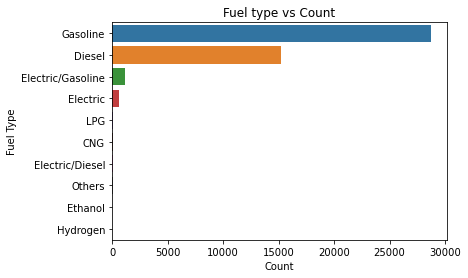

In [11]:
# plot bar chart for fuel type vs count
ax = sns.countplot(y="fuel",data=df, order=df.fuel.value_counts().index)
ax.set(xlabel="Count", ylabel="Fuel Type", title="Fuel type vs Count")
plt.show()

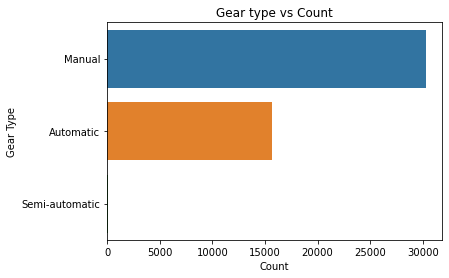

In [12]:
# plot bar chart for gear type vs count
ax = sns.countplot(y="gear",data=df)
ax.set(xlabel="Count", ylabel="Gear Type", title="Gear type vs Count")
plt.show()

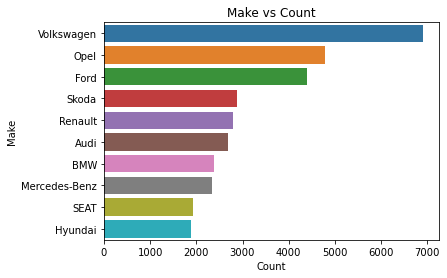

In [13]:
# plot bar chart for make vs count
ax = sns.countplot(y="make", data=df, order=df.make.value_counts().iloc[:10].index)
ax.set(xlabel="Count", ylabel="Make", title="Make vs Count")
plt.show()

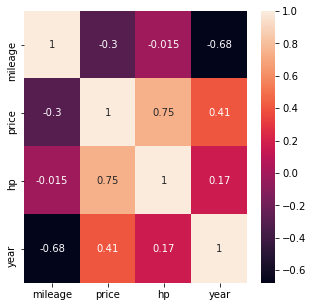

In [14]:
# heatmap to identify the correlation between each variable
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

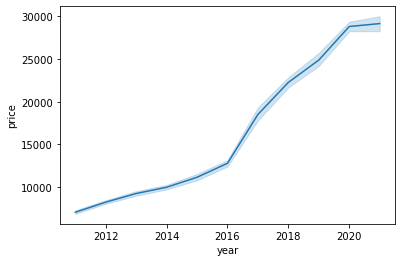

In [15]:
# line chart to identify the price trend over years
sns.lineplot(data=df, x="year", y="price")
plt.show()

<AxesSubplot:ylabel='price'>

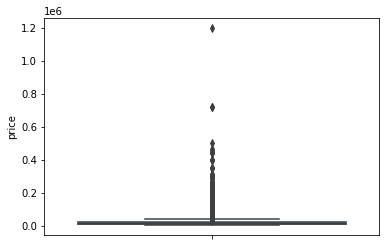

In [28]:
sns.boxplot(y=df['price'])

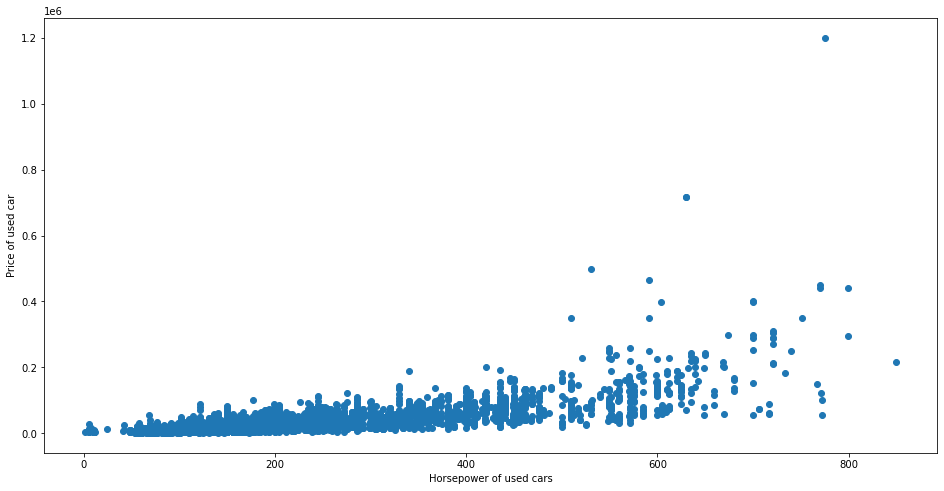

In [26]:
# scatterplot to identify outliers
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['hp'], df['price'])
ax.set_xlabel('Horsepower of used cars')
ax.set_ylabel('Price of used car')
plt.show()

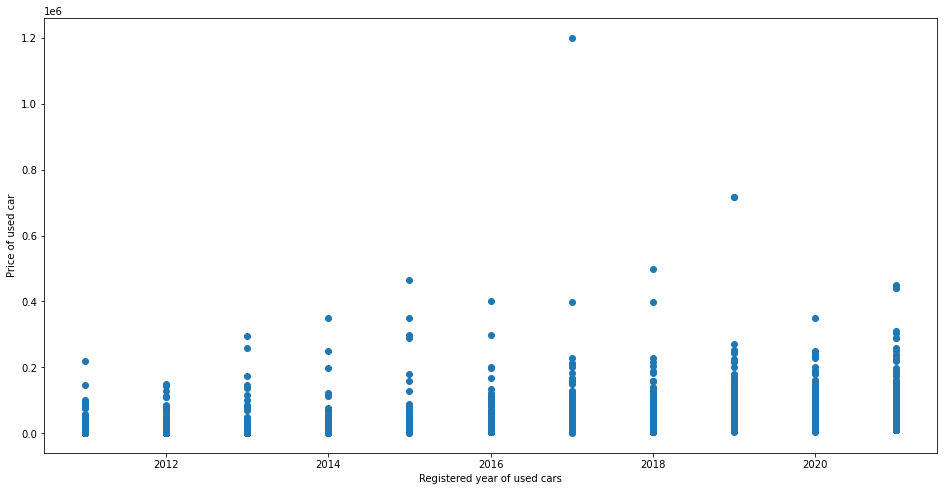

In [21]:
# scatterplot to identify outliers
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['price'])
ax.set_xlabel('Registered year of used cars')
ax.set_ylabel('Price of used car')
plt.show()

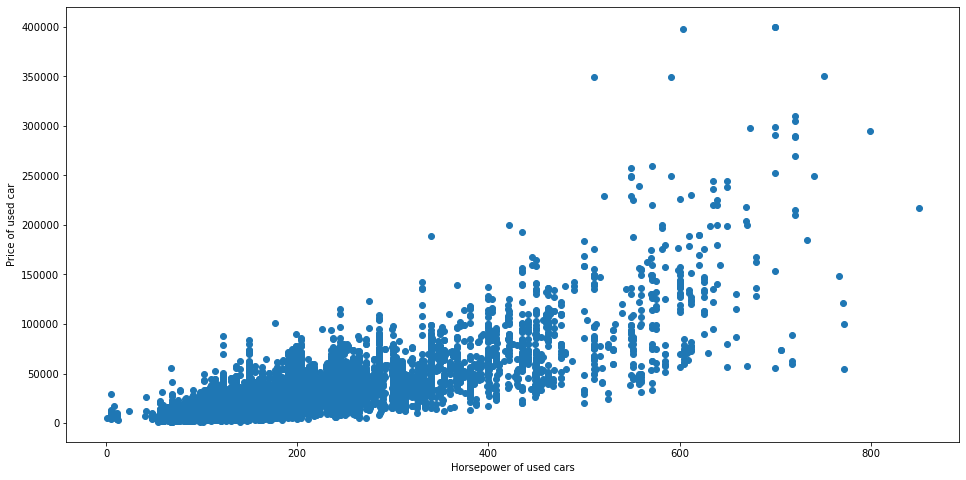

In [30]:
df_filtered = df[df['price'] <= 400000]

# scatterplot to identify outliers
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_filtered['hp'], df_filtered['price'])
ax.set_xlabel('Horsepower of used cars')
ax.set_ylabel('Price of used car')
plt.show()

In [33]:
df.sort_values(by='price', ascending=False)

,mileage,make,model,fuel,gear,price,hp,year
21675,431,Ferrari,F12,Gasoline,Automatic,1199900,775.0,2017
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,717078,630.0,2019
11753,90,Maybach,Pullman,Gasoline,Automatic,717078,630.0,2019
16429,3400,Maybach,Pullman,Gasoline,Automatic,499800,530.0,2018
29257,350,Mercedes-Benz,SLS,Gasoline,Automatic,465000,591.0,2015
...,...,...,...,...,...,...,...,...
24365,133000,Opel,Corsa,Gasoline,Manual,1300,69.0,2012
17811,222000,Peugeot,206,Diesel,Manual,1299,68.0,2011
23487,153000,Toyota,Aygo,Gasoline,Manual,1250,68.0,2012
17155,100611,Lada,Priora,Gasoline,Manual,1190,98.0,2011


## References

Lessmann & Stefan. (2017). Car resale price forecasting: The impact of regression method, private information, and heterogeneity on forecast accuracy.

Mordor Intelligence. Used car market size, trends, forecast 2021-26. Retrieved December 12, 2021, from https://www.mordorintelligence.com/industry-reports/global-used-car-market-growth-trends-and-forecast-2019-2024 

Sameerchand Pudaruth. (2014). Predicting the price of used car using Machine Learning Techniques. International Journal of Information & Computation Technology, 4(7),  753-764.

Tan, D. (2020, July 24). Malaysia's used car sector records over 100% growth. Paul Tan's Automotive News. Retrieved December 12, 2021, from https://paultan.org/2020/07/24/malaysias-used-car-sector-records-over-100-growth/  
